In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [13]:
#Load the Data.
#Divide the Data in Training set,Validation set,Test set
os.chdir('C:/Users/Nikhil/Desktop/deeplerning/data/Cats vs dogs')  #Giving the path
if os.path.isdir('train/dog') is False:                            #Creating the folder if it is not present
    os.makedirs('train/dog')               
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'), 5000):         
        shutil.move(c, 'train/cat' )                              #Taking 10000 images as Training set,5000 of each Cat and Dog
    for c in random.sample(glob.glob('dog*'), 5000):
        shutil.move(c, 'train/dog' )
    for c in random.sample(glob.glob('cat*'), 1000):
        shutil.move(c, 'valid/cat')                               #Taking 2000 images as Validation set,1000 of each Cat and Dog
    for c in random.sample(glob.glob('dog*'), 1000):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'test/cat')                                #Taking 1000 images as Test set,500 of each Cat and Dog
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'test/dog')
        
os.chdir('../../')


# Network Parameters
   
   1-Rectifier Linear Unit
   
   2-Adam/RMSprop optimizer
   
   3-Sigmoid on final unit
   
   4-Binary CrossEntropy loss
   
   
 #######################################################################

# MODEL 1

classifier=Sequential()

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2),strides=2))

classifier.add(Conv2D(32,(3,3),activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2),strides=2))

classifier.add(Flatten())

classifier.add(Dense(units=16,activation='relu'))

classifier.add(Dropout(0.5))

classifier.add(Dense(units=1,activation='sigmoid'))

classifier.compile(optimizer=Adam(learning_rate=0.003),loss='binary_crossentropy',metrics=['accuracy'])

Model 1 report:

 **Test loss-0.5778
 ,Test accuracy-0.6730
 
 
 **Valid loss-0.5421
,Valid accuracy-0.7360

 It is surely UNDERFITING
 So,we have to add some more neurons/layers
 
 #######################################################################

# MODEL 2


classifier=Sequential()

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2),strides=2))

classifier.add(Conv2D(64,(3,3),activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2),strides=2))

classifier.add(Conv2D(128,(3,3),activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2),strides=2))

classifier.add(Flatten())

classifier.add(Dense(units=128,activation='relu'))

classifier.add(Dropout(0.5))

classifier.add(Dense(units=1,activation='sigmoid'))

classifier.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

classifier.summary()

Model 2 report:
    
**Test loss-0.3986 ,Test accuracy-0.8236

**Valid loss-0.4951, Valid accuracy-0.7700

It definitely improved in terms of the validation accuracy.
But now we can see that the training loss is  below the validation loss 
and the training accuracy is above the validation accuracy.

It means that our model is OVERFITTING.
Let’s try to improve our previous model by:
    
*lowering the learning rate from 0.001 to 0.0001

*adding high-level (256 filters) convolution layer

*adding fully connected layer


#################################################################


In [14]:
# Model 3

classifier=Sequential()


classifier.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

classifier.add(Conv2D(32,(3,3),activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))


classifier.add(Conv2D(64,(3,3),activation='relu'))
classifier.add(Conv2D(64,(3,3),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Conv2D(128,(3,3),activation='relu'))
classifier.add(Conv2D(128,(3,3),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2),strides=2))

classifier.add(Conv2D(256,(3,3),activation='relu'))
classifier.add(Conv2D(256,(3,3),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(units=256,activation='relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units=256,activation='relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

classifier.summary()

#Model report

#Test loss-0.2071
#Test accuracy-0.9188
 
#Valid loss-0.2590
#Valid accuracy-0.8915



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 27, 27, 128)      

# Data  Augmentation

Using some Data Augmentation Techniques for more data and better results.  

  1- Shearing of images
  
  2- Random zoom
  
  3- Horizontal flip
  

In [15]:
from keras.preprocessing.image import ImageDataGenerator
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [16]:
train_set = training_data_generator.flow_from_directory('C:/Users/Nikhil/Desktop/deeplerning/data/Cats vs dogs/train', #File where data is stored
    target_size=(128,128),     #Size of image
    batch_size=25,             #Number of Batchs
    class_mode="binary")
valid_set = validation_data_generator.flow_from_directory(
    'C:/Users/Nikhil/Desktop/deeplerning/data/Cats vs dogs/valid',
    target_size=(128,128),
    batch_size=25,
    class_mode="binary")
test_set = test_data_generator.flow_from_directory('C:/Users/Nikhil/Desktop/deeplerning/data/Cats vs dogs/test',
    target_size=(128,128),
    batch_size=25,
    class_mode="binary", 
    shuffle=False)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
classifier.fit_generator(train_set,
                        steps_per_epoch=400,            #size of train_set=steps_per_epoch*Batch_size
                        epochs =30,
                        validation_data = valid_set,
                        validation_steps =80,           #size of train_set=validation_steps*Batch_size
                        #callbacks=[tensorboard]
                        );

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 400 steps, validate for 80 steps
Epoch 1/30
400/400 [==============================] - 675s 2s/step - loss: 0.6895 - accuracy: 0.5263 - val_loss: 0.6756 - val_accuracy: 0.5670
Epoch 2/30
400/400 [==============================] - 650s 2s/step - loss: 0.6578 - accuracy: 0.6064 - val_loss: 0.6503 - val_accuracy: 0.6315
Epoch 3/30
400/400 [==============================] - 648s 2s/step - loss: 0.6352 - accuracy: 0.6454 - val_loss: 0.6090 - val_accuracy: 0.6660
Epoch 4/30
400/400 [==============================] - 652s 2s/step - loss: 0.5997 - accuracy: 0.6789 - val_loss: 0.5584 - val_accuracy: 0.7165
Epoch 5/30
400/400 [==============================] - 642s 2s/step - loss: 0.5626 - accuracy: 0.7139 - val_loss: 0.5634 - val_accuracy: 0.7085
Epoch 6/30
400/400 [==============================] - 645s 2s/step - loss: 0.5430 - accuracy: 0.7229 - val_loss: 0.6

In [20]:
#Predict the Data in Test_set
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(50)

,filename,predict,y,y_pred
0,cat\cat.1.jpg,0.00008,0,0
1,cat\cat.10001.jpg,0.00049,0,0
2,cat\cat.10101.jpg,0.06307,0,0
3,cat\cat.10120.jpg,0.45742,0,0
4,cat\cat.10153.jpg,0.00022,0,0
5,cat\cat.10173.jpg,0.02862,0,0
6,cat\cat.10183.jpg,0.00291,0,0
7,cat\cat.10188.jpg,0.03889,0,0
8,cat\cat.1020.jpg,0.03788,0,0
9,cat\cat.10244.jpg,0.11951,0,0


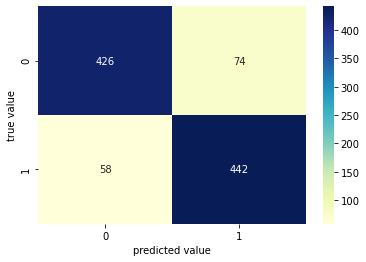

In [21]:
#Confusion matrix
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');